# ロジスティック回帰モデルでの分類

ロジスティック回帰モデルは実装しやすく、幅広い用途で用いられている。  
しかし、線形モデルであるため、データが線形分離可能かどうか判断が必要。  
ロジスティック回帰モデルは基本的に二値分類のモデルであるが、多分類モデルに簡単に拡張できる。

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('sklearn version : ' + sklearn.__version__)

sklearn version : 0.24.1


ロジスティック回帰モデルはパーセプトロンモデルと同様に各入力に対しての重みやバイアスをパラメータとして持つが、  
活性化関数がSigmoid関数である点が異なる。  
また、Sigmoid関数を用いているため、活性化関数後の出力はそれぞれの分類に当てはまる確率となることが特徴である。

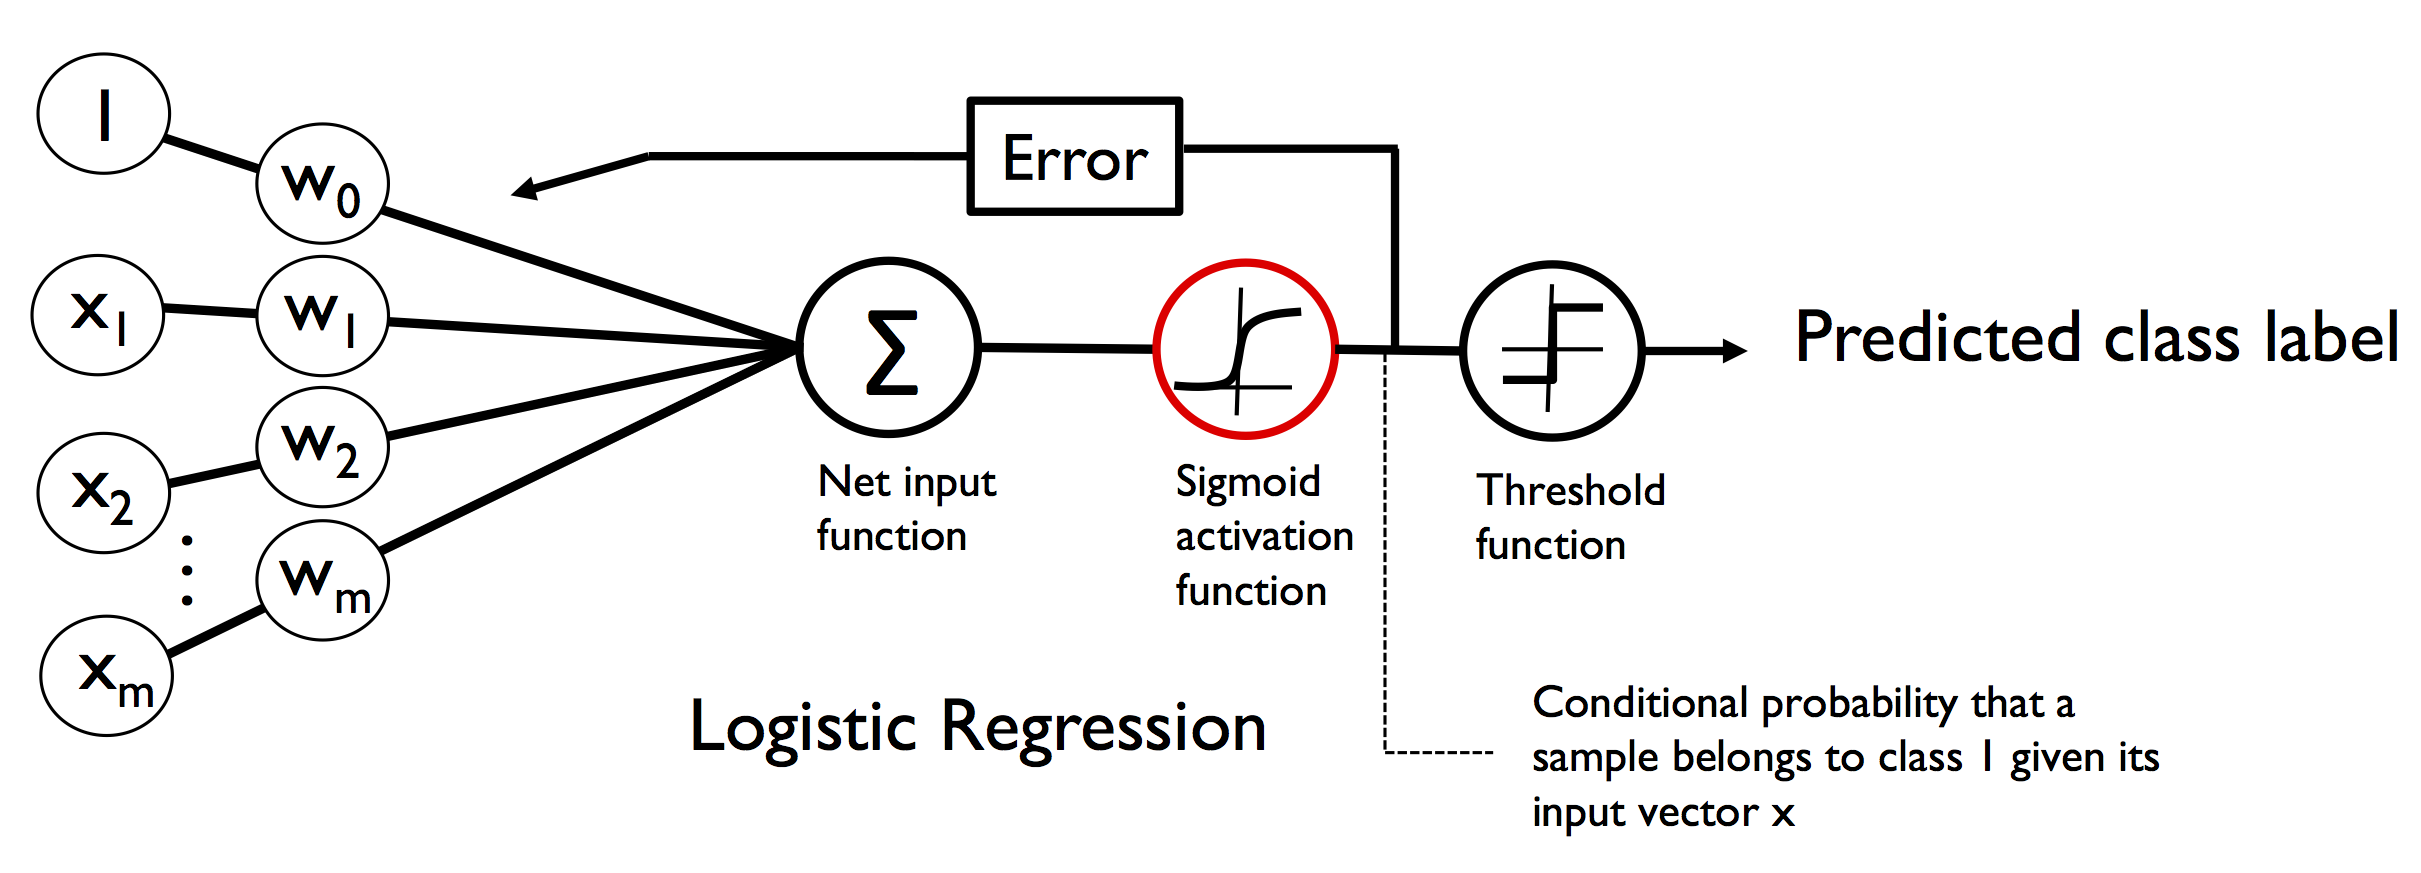

In [2]:
from IPython.display import Image
Image(filename='images/logistic_regression_model.png', width=1000) 

Sigmoid関数は下のようにZ=0, phi=0.5で点対称な関数である。

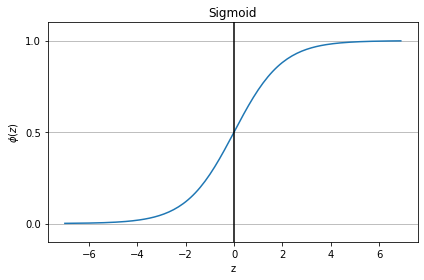

In [3]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.title('Sigmoid')
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

# 二値分類の場合
## データセットの読み込み

In [4]:
import mglearn
from sklearn.linear_model import LogisticRegression

X, y = mglearn.datasets.make_forge()
print('X.shape : ', X.shape)
print('y.shape : ', y.shape)
print('X : \n', X[:5])
print('y : \n', y[:5])

X.shape :  (26, 2)
y.shape :  (26,)
X : 
 [[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]]
y : 
 [1 0 1 0 0]


c:\users\aljp1b400084\.virtualenvs\sklearn_tutorials-x2txrk3g\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


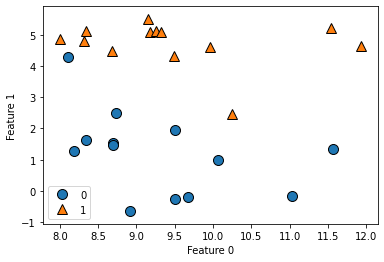

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (19, 2)
X_test.shape :  (7, 2)
y_train.shape :  (19,)
y_test.shape :  (7,)


## ロジスティック回帰モデルの学習

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9473684210526315

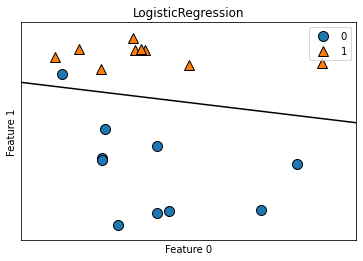

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.plots.plot_2d_separator(model, X_train, fill=False, eps=0.5)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
ax.set_title(model.__class__.__name__)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

## モデルの評価

In [9]:
model.score(X_test, y_test)

0.8571428571428571

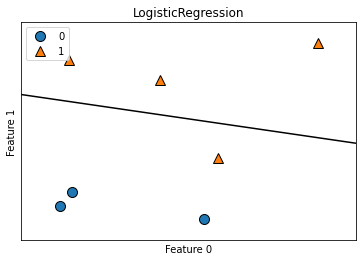

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mglearn.plots.plot_2d_separator(model, X_test, fill=False, eps=0.5)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)
ax.set_title(model.__class__.__name__)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.legend()

## パラメータ調整
C: 正規化パラメータ  
Cの値を調整することでL2正規化の重みを調整することができる。  

C->大：  
正規化を弱くする。重みパラメータの値の大きさがある程度大きくなることを許容する。  
個々のデータを正確にクラス分類を行うようになる。  

C->小：  
正規化を強くする。重みパラメータの大きさを小さくする。  
1つ1つのデータではなく、大多数の分類を行うようになる。

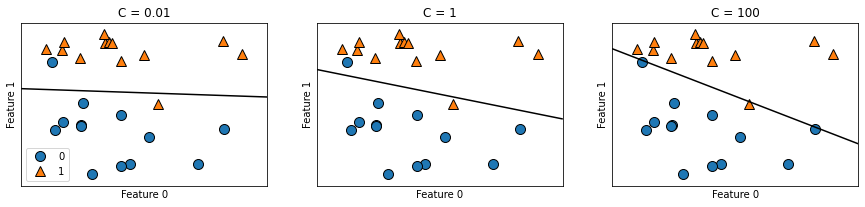

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
cs = [0.01, 1, 100]

for c, ax in zip(cs, axes):
    model = LogisticRegression(C=c)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("C = " + str(c))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

Cの値を小さくすると、各重みパラメータが小さくなっていることがわかる。

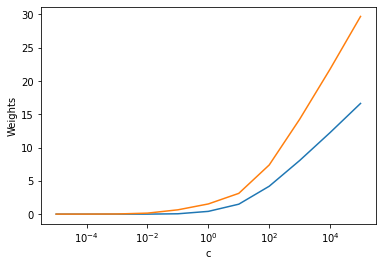

In [12]:
accuracy = []
weights = []
cs = np.logspace(-5, 5, 11, base=10)

for c in cs:
    model = LogisticRegression(max_iter=1000, C=c)
    model.fit(X_train, y_train)
    weights.append(model.coef_[0])
    accuracy.append(model.score(X_test, y_test))

plt.plot(cs, weights)
plt.ylabel("Weights")
plt.xlabel("c")
plt.xscale("log")

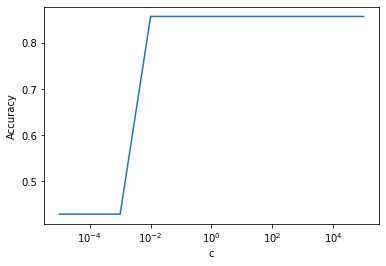

In [13]:
plt.plot(cs, accuracy)
plt.ylabel("Accuracy")
plt.xlabel("c")
plt.xscale("log")

# 高次元特徴量の分類サンプル

ロジスティック回帰モデルは二値分類のモデルであるが、多値分類のモデルに拡張することができる。  
sklearnのライブラリの場合は学習データの内容から自動的に対応してくれる。

## データセットの読み込み

In [14]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

## データセットの確認

In [15]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
print('特徴量の種類')
print(iris_dataset['feature_names'])
print('\nshape')
print(iris_dataset['data'].shape)
print('\n特徴量の確認')
print(iris_dataset['data'][:5])

特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

shape
(150, 4)

特徴量の確認
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [17]:
print('ラベルの種類')
print(iris_dataset['target_names'])
print('\nshape')
print(iris_dataset['target'].shape)
print('\nラベルの確認')
print(iris_dataset['target'])

ラベルの種類
['setosa' 'versicolor' 'virginica']

shape
(150,)

ラベルの確認
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
from sklearn.model_selection import train_test_split

X = iris_dataset['data']
y = iris_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (112, 4)
y_train.shape :  (112,)
X_test.shape :  (38, 4)
y_test.shape :  (38,)


## ロジスティック回帰モデルの学習

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9821428571428571

## モデルの評価

In [20]:
model.score(X_test, y_test)

0.9736842105263158

## パラメータ調整

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=1)
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('y_valid.shape : ', y_valid.shape)
print('y_train.shape : ', y_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (84, 4)
y_train.shape :  (84,)
y_valid.shape :  (28,)
y_train.shape :  (84,)
X_test.shape :  (38, 4)
y_test.shape :  (38,)


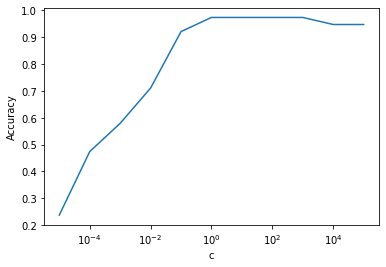

In [22]:
accuracy = []
cs = np.logspace(-5, 5, 11, base=10)

for c in cs:
    model = LogisticRegression(max_iter=1000, C=c)
    model.fit(X_train, y_train) 
    accuracy.append(model.score(X_test, y_test))

plt.plot(cs, accuracy)
plt.ylabel("Accuracy")
plt.xlabel("c")
plt.xscale("log")

## k分割交差検証を用いた検証
作成したモデルがデータ全体に対してどの程度汎化できるかを確認する。  
分割毎に精度にばらつきがある場合は、分割後のデータの偏りがあるまたはデータセットの数が少ないなどの原因が考えられる。

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
scores

array([1.        , 1.        , 0.93333333, 0.93333333, 1.        ])

In [24]:
scores.mean()

0.9733333333333334